## SVM - Python

## Set up data

In [19]:
# LOAD LIBRARIES
import os
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import accuracy_score
import seaborn as sns 
import matplotlib.pyplot as plt

gs = pd.read_csv('../data/cleaned_goldman_sachs_tweets.csv', on_bad_lines='skip')
ap = pd.read_csv('../data/cleaned_apple_tweets.csv', on_bad_lines='skip')
hd = pd.read_csv('../data/cleaned_home_depot_tweets.csv', on_bad_lines='skip')
print(gs.head())
print(ap.head())
print(hd.head())

# Convert csv to dataframe
df1 = gs.copy()
df2 = ap.copy()
df3 = hd.copy()


    goldman
0     sachs
1   laporta
2  tomorrow
3   goldman
4     sachs
       email
0       want
1  something
2       must
3   approach
4     slowly
       koch
0  industry
1  american
2   crystal
3     sugar
4      home


## Reorganize data for SVM

In [20]:
# Push column name of df1 into values
df1.loc[-1] = df1.columns.values
df1.sort_index(inplace=True)
df1.reset_index(drop=True, inplace=True)
df1.rename(columns={"goldman": "tweets"}, inplace=True) #rename column
df1['company'] = 'goldman_sachs' #add new column with company label
print(df1)

# Do the same for df2
df2.loc[-1] = df2.columns.values
df2.sort_index(inplace=True)
df2.reset_index(drop=True, inplace=True)
df2.rename(columns={"email": "tweets"}, inplace=True) #rename column
df2['company'] = 'apple' #add new column with company label
print(df2)

# Do the same for df3
df3.loc[-1] = df3.columns.values
df3.sort_index(inplace=True)
df3.reset_index(drop=True, inplace=True)
df3.rename(columns={"koch": "tweets"}, inplace=True) #rename column
df3['company'] = 'home_depot' #add new column with company label
print(df3)

# Concat dataframes
df = pd.concat([df1, df2, df3])
print(df.head())

               tweets        company
0             goldman  goldman_sachs
1               sachs  goldman_sachs
2             laporta  goldman_sachs
3            tomorrow  goldman_sachs
4             goldman  goldman_sachs
...               ...            ...
1977               uk  goldman_sachs
1978              efc  goldman_sachs
1979  catskillfishing  goldman_sachs
1980  catskillfishing  goldman_sachs
1981  catskillfishing  goldman_sachs

[1982 rows x 2 columns]
         tweets company
0         email   apple
1          want   apple
2     something   apple
3          must   apple
4      approach   apple
...         ...     ...
1426      razak   apple
1427       nata   apple
1428      geoff   apple
1429       nata   apple
1430      chris   apple

[1431 rows x 2 columns]
            tweets     company
0             koch  home_depot
1         industry  home_depot
2         american  home_depot
3          crystal  home_depot
4            sugar  home_depot
...            ...         ...
1

In [21]:
## SET X AND Y

# y: CONVERT FROM STRING LABELS TO INTEGERS 
labels=[]; 
y=[]
for label in df["company"]:
    if label not in labels:
        labels.append(label)
        print("index =",len(labels)-1,": label =",label)
    for i in range(0,len(labels)):
        if(label==labels[i]):
            y.append(i)
y = np.array(y)
y = df['company']

# X
corpus=df["tweets"].to_list()
# Initialize count vectorizer

# Ignore terms that appear in less than 1% of the documents
vectorizer=CountVectorizer(min_df=0.01)   

# Run count vectorizer on corpus 
Xs  =  vectorizer.fit_transform(corpus)   
X=np.array(Xs.todense())

# Convert to one-hot vectors
maxs=np.max(X,axis=0)
X=np.ceil(X/maxs)

# Double check
print(X.shape,y.shape)
print("DATA POINT-0:",X[0,0:10],"y =",y[0])


index = 0 : label = goldman_sachs
index = 1 : label = apple
index = 2 : label = home_depot
(5341, 29) (5341,)
DATA POINT-0: [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.] y = 0    goldman_sachs
0            apple
0       home_depot
Name: company, dtype: object


In [22]:
# Partion data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=4)

# Check 
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(4272, 29)
(4272,)
(1069, 29)
(1069,)


## Support Vector Classifier

In [23]:
# Initialize model
from sklearn.svm import SVC

C=500
mykernel = 'sigmoid'

fit1 = SVC(C=C,kernel=mykernel)

fit1

SVC(C=500, kernel='sigmoid')

In [24]:

# Fit to training data
fit1.fit(X_train, y_train) 

# Predict on X_train
y_train_pred = fit1.predict(X_train) 

In [25]:
# TEST ACCURACY
# Training set
print("Training set")
print("Accuracy: ", accuracy_score(y_train, y_train_pred) * 100) #accuracy score
print("Number of mislabeled points out of a total 4275 points: ", (y_train != y_train_pred).sum()) #mislabeled points

# Test set
y_test_pred = fit1.predict(X_test)
print("Test set")
print("Accuracy: ", accuracy_score(y_test, y_test_pred)*100) #accuracy score
print("Number of mislabeled points out of a total 1069 points: ", (y_test != y_test_pred).sum()) #mislabeled points

Training set
Accuracy:  67.15823970037454
Number of mislabeled points out of a total 4275 points:  1403
Test set
Accuracy:  64.26566884939196
Number of mislabeled points out of a total 1069 points:  382


## Visualize data

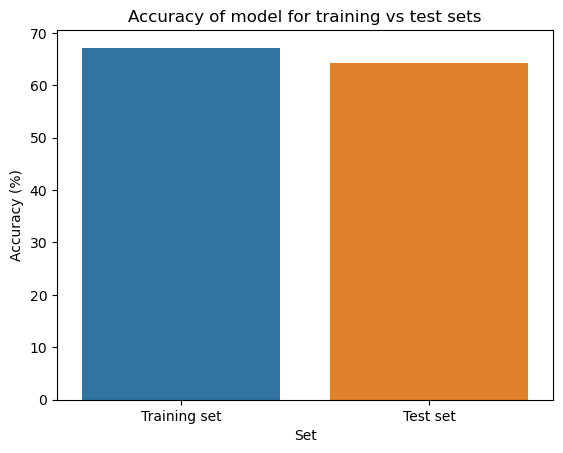

In [26]:
model_accuracies = pd.DataFrame({'Set':['Training set','Test set'], 'Accuracy (%)': [accuracy_score(y_train, y_train_pred) * 100, accuracy_score(y_test, y_test_pred)*100]})
sns.barplot(data=model_accuracies, x="Set", y="Accuracy (%)").set(title = 'Accuracy of model for training vs test sets' )

# Save plot
plt.savefig("../501-project-website/images/svm_"+str(mykernel)+"_tweets_accuracy.png")

## Confusion matrix

/Users/cynthiang/opt/anaconda3/envs/class/lib/python3.10/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


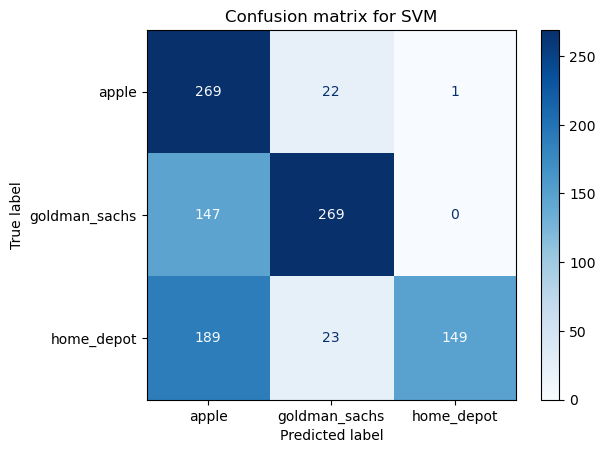

In [27]:
from sklearn.metrics import plot_confusion_matrix

plot_confusion_matrix(fit1 , X_test ,  y_test ,  cmap="Blues")

# Plot confusion matrix
plt.title("Confusion matrix for SVM")

# Save confusion matrix plot
plt.savefig("../501-project-website/images/SVM_"+str(mykernel)+"_tweets_confusion_matrix.png")